Script to simulate hydrodynamics over a river section based on different discharges upstream.

The physical calculations are performed by the analytical model based on the Manning formula, for which stationar and uniform flow is assumed:

    Q=K S^0,5 A R^(2/3)

To do that first the geometric parameters (hydraulic radius, perimeter and surface area) are computed by the function conv_function_basic() based on the input of a criss section('data_bat_csv).

Since we are not always dealing with normal flow a backwatercurve is performed by the Bresse fit
    d = de + (d0-de)2^(L/105) with L05 - 0.24 de /S*d(d0/de)^0,75
    
By Bart Strijker, adapted by Koen Hiemstra, adapted by PhD-student Frederik Vinke

Version Frederik
This is a basic concept model for PhD-research. In this case one river stretch is assumed for a certain river discharge.
This basic model will be extented to a model for the river branches of the Waal.



In [198]:
#In this cell all the needed packages in this script are imported:

import math
from numpy import *
import matplotlib.pyplot as plt

In [199]:
#Physical parameters
g=9.81

In this part the parameters of the riversystem (width, conveyance area, length, bed slope and roughnes) are defined or loaded based on the available files.

In [200]:
#Channel dimensions 
B=250 # width of the river [m]
m=0 #slope of riverbank
L=36 # length of the riverstretch [km]
x0=0 #starting point

#Channel slope
#According to De Vries (1993), Sieben (2009), Sloff et al.(2014) and Blom (2016), the channel slope of the Waal river is 1.0*10^-4
#and 1.2*10^-4.
S=1.2*10**-4

#Roughness
n_main=0.03 


#Bathymetry river Waal 

import csv
with open ('waal_rkm.csv') as f:   #Reading csv file with bathymetry data of the river Waal
    reader = csv.reader(f, delimiter=';')
       
    kms=[]
    waterlevels=[]
    widths=[]
    depths_summer=[]
    depths_winter=[]
    
    for row in reader:
        km = row[1]
        wl = row [3]
        width = row[4]
        depth_summer = row[7]
        depth_winter = row[9]

        
        kms.append(km) # list of riverkilometers
        waterlevels.append(wl) # list of waterlevels at location
        widths.append(width) #list of average width of summerbed at riverkilometer
        depths_summer.append(depth_summer) #list of average depth of summerbed at riverkilometer
        depths_winter.append(depth_winter) #list of average depth of winterbed at riverkilometer
        
        list1 = (kms[1:93])
        x=[float(i) for i in list1] #change strings into floating number
        
        t=x[::-1]
               
        list2 = (waterlevels[1:93])
        waterlevel=[float(i) for i in list2] #change strings into floating number
        
        list3 = (widths[1:93])
        b=[float(i) for i in list3] #change strings into floating number
                
        list4 = (depths_summer[1:93])
        d_summer=[float(i) for i in list4] #change strings into floating number

        list5 = (depths_winter[1:93])
        d_winter=[float(i) for i in list5] #change strings into floating number
    
#A list of the distance between the locations is determined based on the riverlocations    
    x=[float(i) for i in list1] #change strings into floating
    N=len(x) #number of locations
    M=N-1 #number of riverstretches
    xdiff = [x[n]-x[n-1] for n in range(1,len(x))]
    dx=xdiff #distance between the locations
    
#Construction of cross-sections at the riverkilometer; The assumption are 1)rectangular cross-section of the summerbed.
#2)only lower river discharge are taken into account in this model
bottomlevel_summer = [waterlevel[n]-d_summer[n] for n in range (0,len(waterlevel))] #bottom summerbed level tov NAP in [mm]
bottomlevel_winter = [waterlevel[n]-d_winter[n] for n in range (0,len(waterlevel))] #bottom winterbed level tov NAP in [mm]

cor_bl_sum = [bottomlevel_summer[n]/100 for n in range (0,len(waterlevel))] #bottom level summerbed tov NAP in [m]
cor_bl_win = [bottomlevel_winter[n]/100 for n in range (0,len(waterlevel))] #bottom level winterbed tov NAP in [m]
depth_summerbed = [cor_bl_win[n]-cor_bl_sum[n] for n in range (0,len(waterlevel))] #depth of summerbed tov NAP in [m]

#depth_summerbed = [cor_bl_win[n]-cor_bl_sum[n] for n in range (0,len(waterlevel))] #depth of summerbed tov NAP in [m]
test = [round(depth_summerbed[n],2) for n in range (0,len(waterlevel))]
#print(test)


In [208]:
#This cell is added to test the cell above by printing some of the variables.

#print(x)
#print(waterlevel)
#print(b)
#print(d_summer)
#print(d_winter)
#print(dx)
#print(depth_summerbed)
#print(test)

Text(0.5,0,'distance, x [m]')

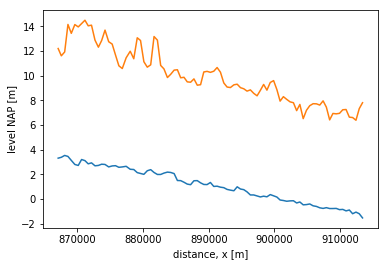

In [209]:
#This cell is added to plot figures based on the determined variables.

#import matplotlib.pyplot as plt

plt.plot(x,cor_bl_sum, x, cor_bl_win)
plt.ylabel('level NAP [m]')
plt.xlabel('distance, x [m]')

This part describes the hydraulic boundary conditions: incoming river discharge upstream of the river and the downstream water level based on a Q-h relation. 

In [214]:
#Riverdischarge upstream
Q=1050

#Downstream water level based on Q-h relation
if Q < 1000:
    h=2.33*math.log(Q)-11.863
    
elif 1000<=Q & Q<=1400:
    h=3.9585*math.log(Q)-23.128

elif 1400<=Q & Q<=4000:
    h=3.7355*math.log(Q)-21.671

elif 4000<=Q & Q<=7071:
     h=3.7364*math.log(Q)-21.51
        
elif Q>7071:
       h=3.9585*math.log(Q)-23.128

h_down=h

#Downstream waterdepth
d_down=h_down-cor_bl_sum[91]

In [215]:
#This cell is added to print variables determined in the previous cell.
print('The incoming river discharge upstream is',Q,'m3/s.')
print('The downstream water level is',round(h_down,2),'m.')
print('The downstream water depth is',round(d_down,2),'m.')

The incoming river discharge upstream is 1050 m3/s.
The downstream water level is 4.41 m.
The downstream water depth is 5.93 m.


In [205]:
#Flip arrays for calculation starting at the downstream location of the riverstretch

wl_flip=waterlevel[::-1]
b_flip=b[::-1]
bl_sum_flip=cor_bl_sum[::-1]
bl_win_flip=cor_bl_win[::-1]
dx_flip=dx[::-1]

The discharge at given point x will be calculated based on the Manning formula.

Bresse equation

Based on the Bresse equation the backwatercurve based on the downstream water level can be determined.

In [156]:
L= 50000 #length between point downstream and point upstream of riverstretch [m]
S=0.00012
C=50 #chezy-coefficient
Q=1000 #river discharge [m3/s]
#B=250 #width [m]
d_down=5.74 #waterdepth [m] 

q = [Q/b_flip[n] for n in range (0, len(dx))] #discharge per unit width for each river stretch
cor_q=[round(q[n],2) for n in range (0,len(dx))]

h_eq = [(q[n]**2/((C**2)*S))**(1/3)for n in range (0, len(dx))] #equilibrium water depthfor each river stretch
cor_h_eq=[round(h_eq[n],2) for n in range (0,len(dx))]

L_05 = [(0.24*cor_h_eq[n]/S)*(d_down/cor_h_eq[n])**(4/3)for n in range (0, len(dx))] #half length for each river stretch

#print(L_05)


In [193]:
print(d_down)

dflip = zeros(len(dx))

for i in range (0,len(dx)-1):
    dflip[0]=d_down
    dflip[i+1] = h_eq[i] + (dflip[i]-h_eq[i])*(1/2)**(dx_flip[i]/L_05[i])#depth at location x+1

    #print()
    
 #from numpy import *

#wflip = zeros(len(dx))

#for i in range (0,len(dx)-1):
  #  wflip[0]=d_down
   # wflip[i+1] = cor_bl_sum [i] + h_eq[i] + (wflip[i]-h_eq[i])*(1/2)**(wflip[i]/h_eq[i])#depth at location x+1

   # w=wflip[::-1]

5.74


TypeError: 'module' object is not callable

Text(0.5,0,'distance, x [m]')

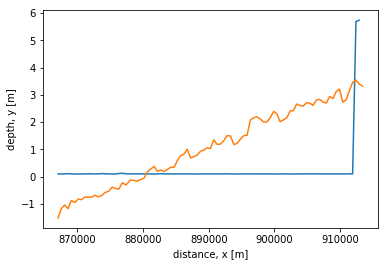

In [182]:
#Cell added to print and plot.

#print("The discharge per unit width is",round(q,2),'[m2/s].')
#print(cor_q)

#print("The equilibrium water depth is",round(h_eq,2),'[m].')
#print(cor_h_eq)

#print(wflip)

#import matplotlib.pyplot as plt

plt.plot(x[0:91], dflip, x,bl_sum_flip)
plt.ylabel('depth, y [m]')
plt.xlabel('distance, x [m]')

De onderstaande berekening is gebaseerd op een voorbeeld van Youtube: "open channel flow - python coding" - Amiane McEwen

In [126]:
from numpy import *
from scipy.optimize import fsolve,newton

#normal flow
def Manning (y, Q, b, S, n, k, m):
    A=(b+m*y)*y # conveyance surface area [m2] =>(width*depth)
    R=A/(b+2*y*(1+m**2)**(1/2)) #hydraulic radius [-]
    return Q-(C0/n)*A*R**(2/3)*S**(1/2)

#critical flow
def critT(y):
    A=(b+m*y)*y
    B=b+2*m*y
    return Q/math.sqrt(g*A**3/B)-1
 
g=9.81
Q=30
b=10
m=0
S0=0.0050 #bed slope of the river
x0=0 #starting point

k=1 #roughnesse dependend on discharge
n=0.03 #roughness
C0=1

yc=newton(critT,0.2)
y0=fsolve(Manning,1, args=(Q, b, S0, n, C0, m))
print('critical deptph [m]', around(yc, decimals=3))
print('normal waterdepth [m] is', around(y0,decimals=3))

critical deptph [m] 0.972
normal waterdepth [m] is [1.265]


In [122]:
#specify depths

yd=yc #downstream
yu = around(y0, decimals=4) #upstream
yu=1.2619 #needed to match Moglen

In [135]:
#calculate profile (small number of points) 
N= 8 #number of calculation points
y= array([yd, 1, 1.05, 1.1, 1.15, 1.2, 1.25, yu])

#N=100
#y= linespace[yd, yu, N]

dx = zeros(N-1)
x = zeros (N)

A = (b+m*y)*y
R = A/(b+2*y*(1+m**2)**(1/2))
Sf = (Q*n/(C0*A*R**(2/3)))**2
E = y+Q**2/(2*g*A**2) # 

dx = (E[1:]-E[:-1])/(S0-0.5*(Sf[1:]+Sf[:-1]))
x[0] = x0
x[1:] = dx
x = cumsum(x)

In [136]:
print(around(x, decimals=2))

[   0.     -0.2    -1.8    -5.78  -13.87  -30.72  -77.92 -136.11]


distance to the upstream bc = -136.11


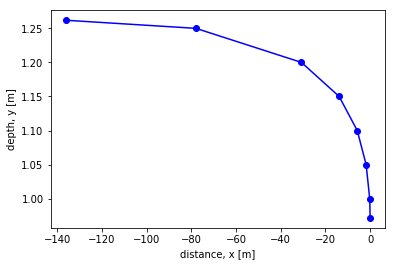

In [137]:
import matplotlib.pyplot as plt

plt.plot(x,y, linestyle='-', marker='o', color='b')
plt.ylabel('depth, y [m]')
plt.xlabel('distance, x [m]')
print('distance to the upstream bc =', around (x[N-1], decimals=2))

distance to the upstream bc = -136.11


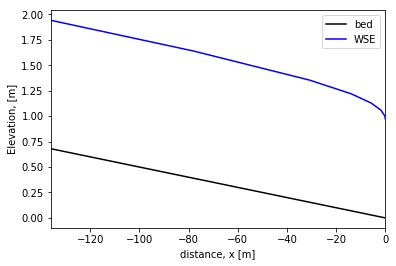

In [138]:
eta = -x*S0
WSE = eta+y

plt.plot(x,eta, 'k-', label='bed')
plt.plot(x,WSE, linestyle='-', color='b', label='WSE')
plt.legend()
plt.ylabel('Elevation, [m]')
plt.xlabel('distance, x [m]')
plt.xlim(x[N-1],x[0])
print('distance to the upstream bc =', around(x[N-1], decimals=2))

Hier onder allemaal test scripts voor onderdelen!!!!!

In [ ]:
L= 50000 #length between point downstream and point upstream of riverstretch [m]
S=0.0001
C=50 #chezy-coefficient
Q=803 #river discharge [m3/s]
B=250 #width [m]
h_down=4.34 #waterdepth [m] 

q=Q/B#discharge per unit width
#print("The discharge per unit width is",round(q,2),'[m2/s].')

h_eq=(q**2/((C**2)*S))**(1/3)
#print("The equilibrium water depth is",round(h_eq,2),'[m].')

L_05 = (0.24*h_eq/S)*(h_down/h_eq)**(4/3) #half length
#print("The half length is",round(L_05),'[m].')

h_location = h_eq+(h_down-h_eq)*(1/2**(L/L_05))
#print("The waterdepth at location at distance L is",round(h_location,2),'[m].')



#verder uitgewerkte test versie
#q = [Q/b[n] for n in range (0, len(dx))] #discharge per unit width for each river stretch
#cor_q=[round(q[n],2) for n in range (0,len(dx))]
#print("The discharge per unit width is",round(q,2),'[m2/s].')
#print(cor_q)

#h_eq=[(q[n]**2/((C**2)*S))**(1/3)for n in range (0, len(dx))] #equilibrium water depthfor each river stretch
#cor_h_eq=[round(h_eq[n],2) for n in range (0,len(dx))]
#print("The equilibrium water depth is",round(h_eq,2),'[m].')
#print(cor_h_eq)

#L_05 = [(0.24*cor_h_eq[n]/S)*(h_down/cor_h_eq[n])**(4/3)for n in range (0, len(dx))] #half length for each river stretch
#cor_L_05=[round(L_05[n],0) for n in range (0,len(dx))]
#print("The half length is",round(L_05),'[m].')
#print(cor_L_05)

#h_location = [cor_h_eq[n]+(h_down-cor_h_eq[n])*(1/2**(dx[n]/cor_L_05[n]))for n in range (0, len(dx))] #depth at location x+1 
#cor_h_location=[round(h_location[n],2) for n in range (0,len(dx))]
#print("The waterdepth at location at distance L is",round(h_location,2),'[m].')
#print(cor_h_location)

In [ ]:
#Channel dimensions
b=250 # width of the river [m]
m=0 #slope of riverbank
L=36 # length of the riverstretch [km]
x0=0 #starting point

#Channel slope
#According to De Vries (1993), Sieben (2009), Sloff et al.(2014) and Blom (2016), the channel slope of the Waal river is 1.0*10^-4
#and 1.2*10^-4.
S=0.00012

#Roughness
n_main=0.03 #Gauckler-Manning coefficient
k=1 #or 1.49 for English units
K=1/n_main

Qup=500

y=2.8 #trail and error to find y

A=(b+m*y)*y #conveyance surface area [m2] =>(width*depth)
P=(b+2*y*(1+m**2)**1/2) #Perimeter [m]
R= A/P #hydraulic radius [-]
Q=K*(S**0.5)*A*R**(2/3)

Q_round=round(Q,0)
print(Q_round)


In [192]:
from numpy import *
from scipy.optimize import *

k=1 #roughnesse dependend on discharge
n=0.03 #roughness
S=0.00012 #bed slope of the river
m=0
b=250
g=9.81
Q=30

#normal flow
def V_Manning (A, Rh, S, n):
    return A*Rh**(2/3.)*S**0.5/n
    
Q=V_Manning(50, 0.2859, 0.005236, 0.03)  
print('riverdischarge [m3/s]', round(Q,2))

    #    A=(b+m*y)*y # conveyance surface area [m2] =>(width*depth)
 #   R= A/(b+2*y*(1+m**2)**1/2) #hydraulic radius [-]
  #  return  (k/n)*S^0.5*A*R^(2/3)


#critical flow
def critT(y):
    A=(b+m*y)*y
    B=b+2*m*y
    return Q/math.sqrt(g*A**3/B)-1

yc=newton(critT,0.2)
y=fsolve(Manning,10, args=(Q, b, S, n, k, m))
print('critical deptph [m]', round(yc,2))
#print('normal waterdepth [m] is',y)

riverdischarge [m3/s] 52.34
critical deptph [m] 0.16
